# DP1 ComCam standard bandpasses

This notebook still uses the embargo repo and needs to be updated to the DP1 repo when the 
data are included in the DP1 repo. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

from lsst.daf.butler import Butler,  CollectionType
import lsst.geom
from lsst.utils.plotting import publication_plots, get_multiband_plot_colors, get_multiband_plot_symbols, get_multiband_plot_linestyles

In [2]:
# Ignore botocore credential messages
logging.getLogger('botocore.httpchecksum').setLevel(logging.WARNING)
logging.getLogger('botocore.credentials').setLevel(logging.WARNING)

In [3]:
# Set publication style
publication_plots.set_rubin_plotstyle()
colors = get_multiband_plot_colors()
bands = colors.keys() 
symbols = get_multiband_plot_symbols()

Set up Rubin matplotlib plot style.


In [4]:
butler = Butler("embargo", instrument="LSSTComCam", 
                collections = ['LSSTComCam/runs/DRP/DP1-RC1/w_2025_02/DM-48371',
                               'u/erykoff/LSSTComCam/DM-47303/lookuptable'])

In [5]:
# Get the unique set of physical filters used for ComCam   
# Change to 'visit_table" for DP1 
physical_filters= butler.get("visitTable", 
                        parameters={"columns":['physical_filter']},
                        storageClass='DataFrame').physical_filter.unique()

# Sorted in band order for plotting
physical_filters = sorted(
    physical_filters,
    key=lambda x: list(bands).index(x[0]) if x[0] in list(bands) else len(bands)
)
physical_filters

['u_02', 'g_01', 'r_03', 'i_06', 'z_03', 'y_04']

In [6]:
# Compute throughputs over the LSST wavelength
wavelengths = np.linspace(3000.0, 11000.0)
throughputs = {}
for pf in physical_filters:
    std_bp = butler.get("fgcm_standard_passband", physical_filter=pf)
    throughputs[pf] = std_bp.sampleAt(lsst.geom.Point2D(0, 0), wavelengths)    

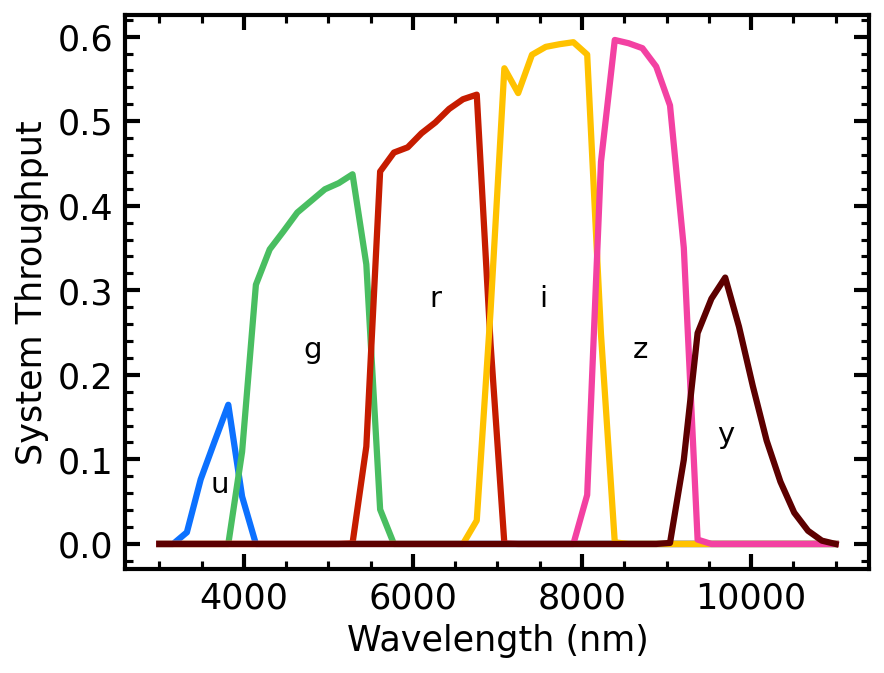

In [7]:
# Plot 
plt.figure()
for label, d in throughputs.items():
    plt.plot(wavelengths, d,
             color = colors[label[0]],
             label=label)
    
# Add axis labels and title
plt.xlabel('Wavelength (nm)')  
plt.ylabel('System Throughput')

# Annotate with band label
plt.text(3600, 0.06, 'u')
plt.text(4700, 0.22, 'g')
plt.text(6200, 0.28, 'r')
plt.text(7500, 0.28, 'i')
plt.text(8600, 0.22, 'z')
plt.text(9600, 0.12, 'y')

plt.savefig("../figures/comcam_std_throughputs.png", 
            bbox_inches='tight',  # Trim whitespace around the figure
            transparent=True,     # Transparent background
            format='png')         # Explicit format specification

In [8]:
# Only close the figure after saving
plt.close()